In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [17]:
# 1. Memuat dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Eksplorasi awal dataset
df.head()  # Menampilkan 5 baris pertama

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [18]:
# Informasi dasar tentang dataset (tipe data, missing values, dll.)
df.info()

# Statistik deskriptif
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


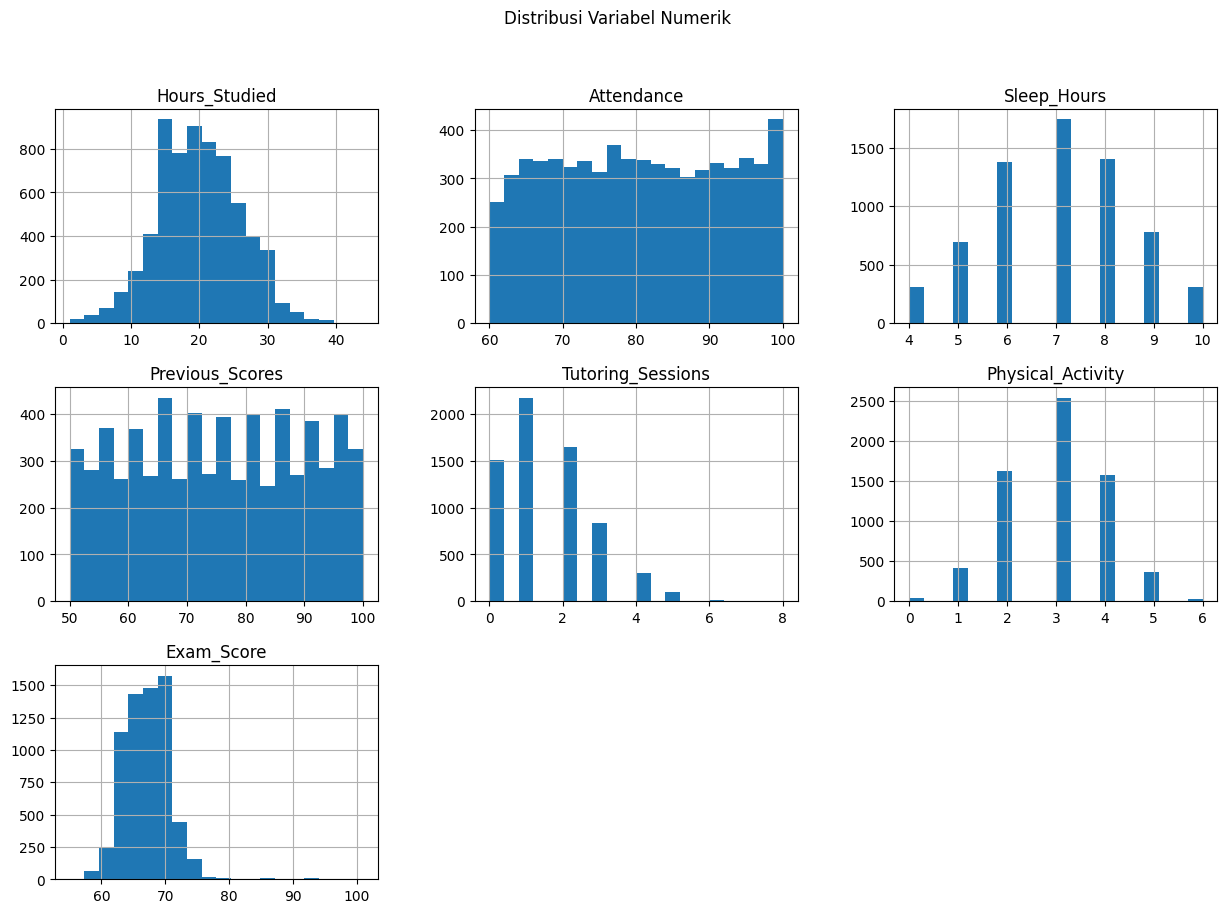

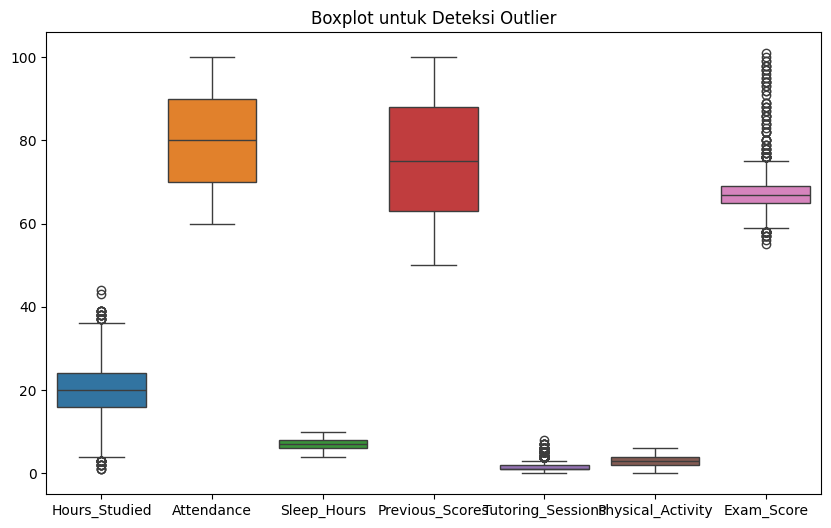

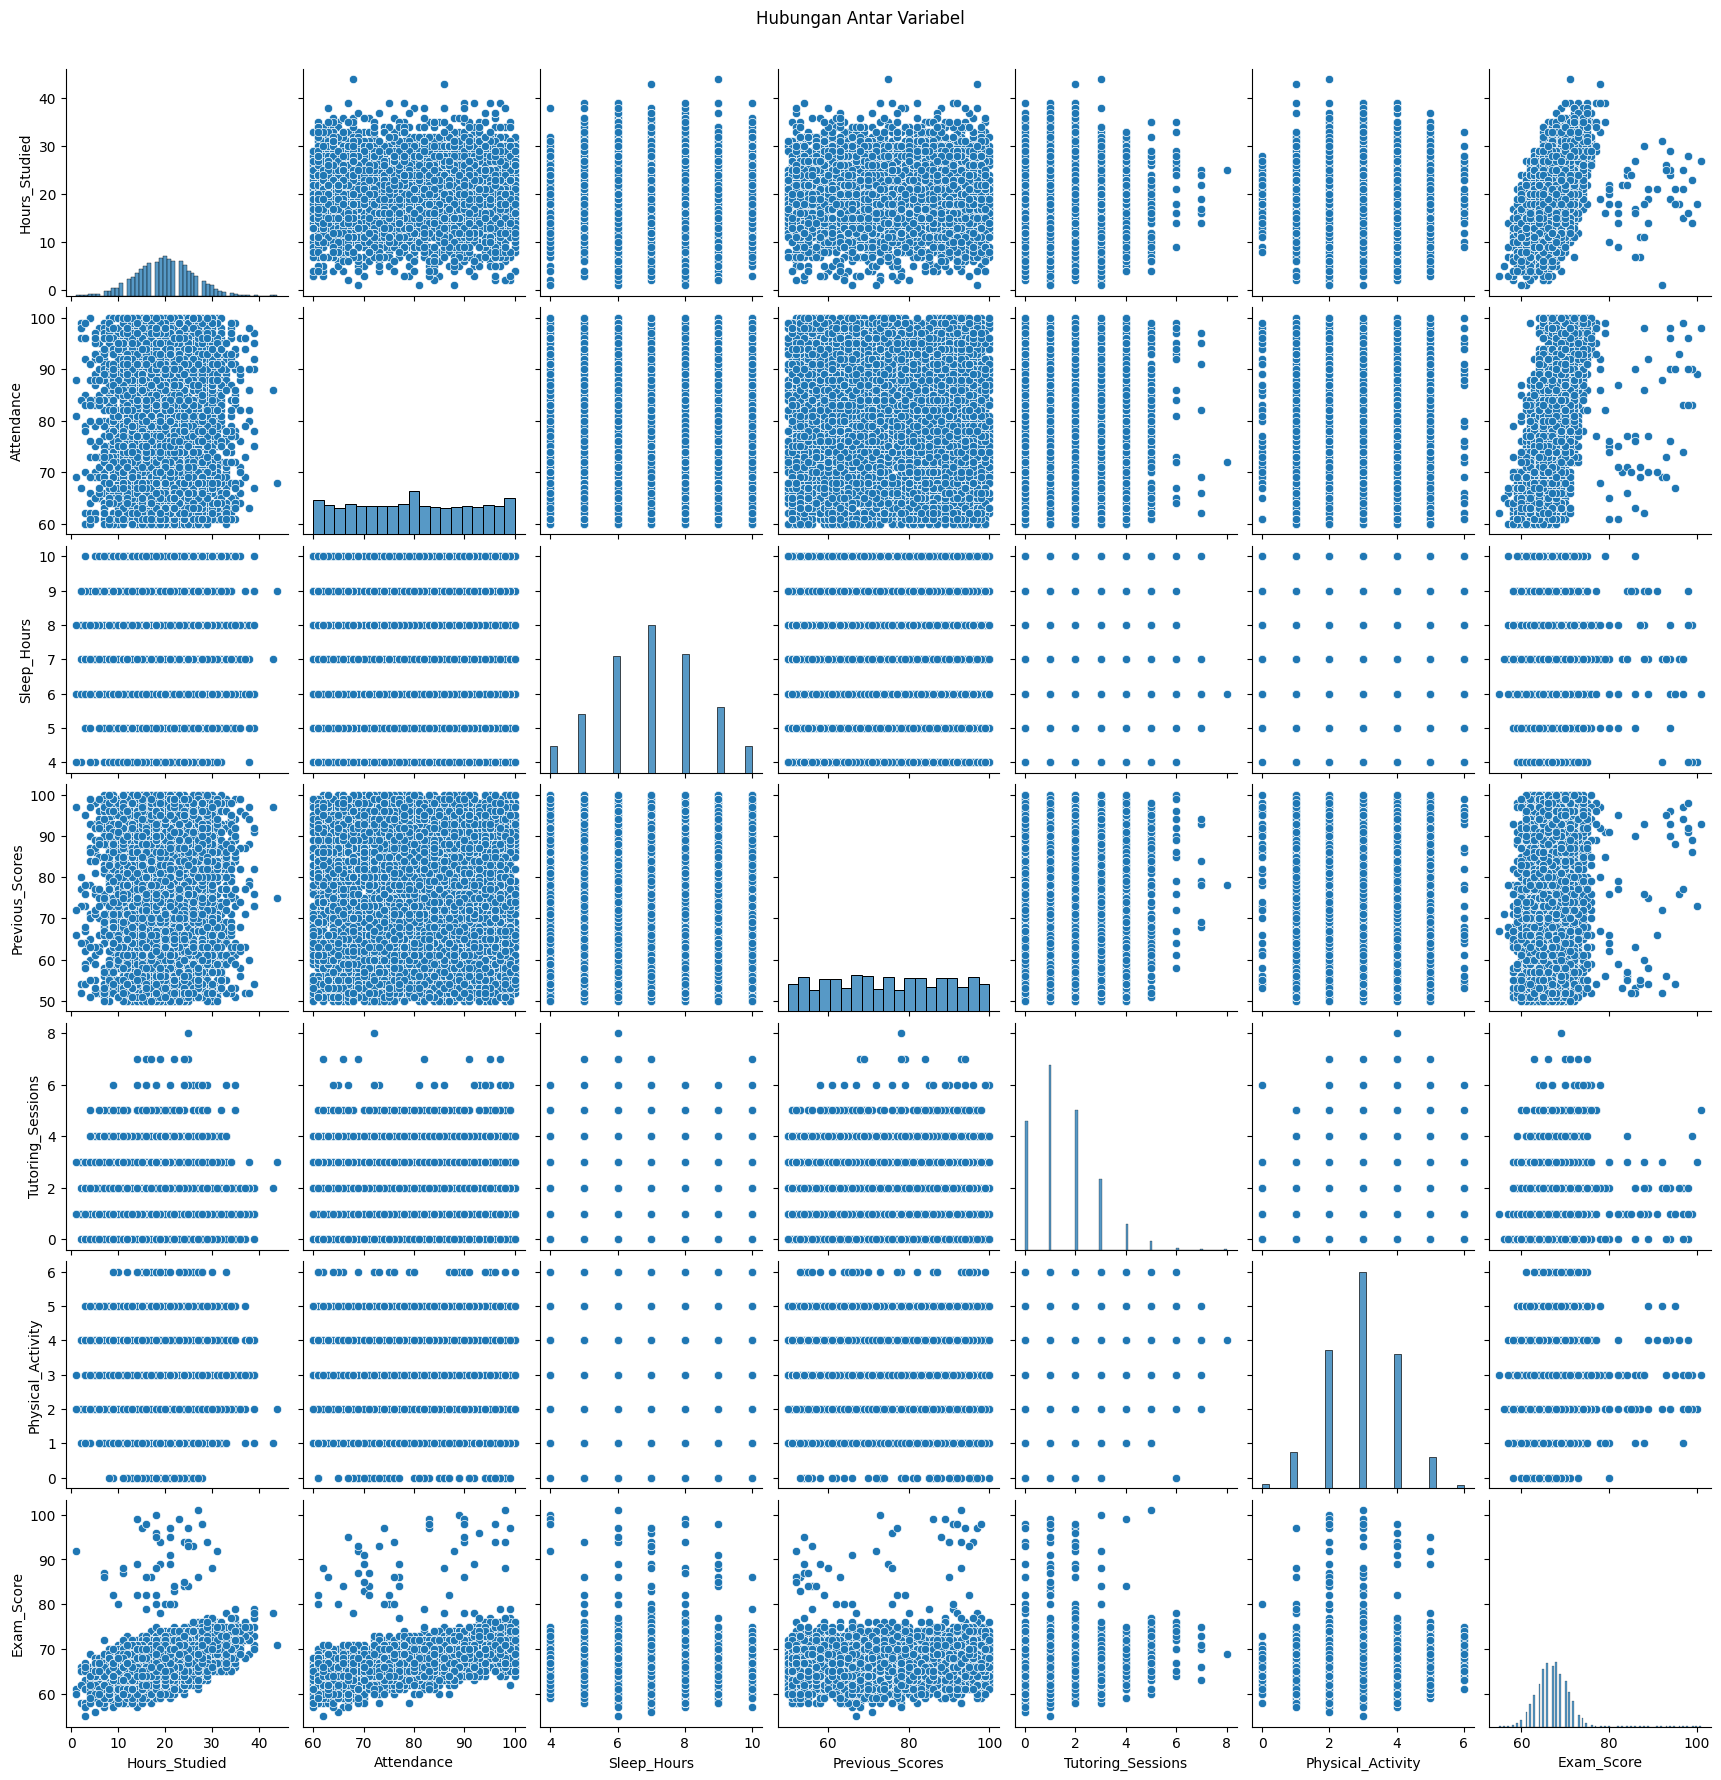

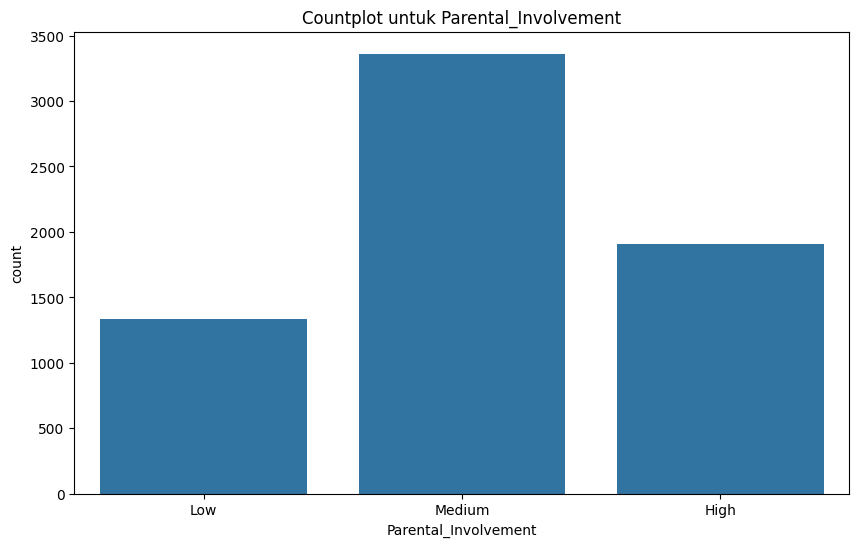

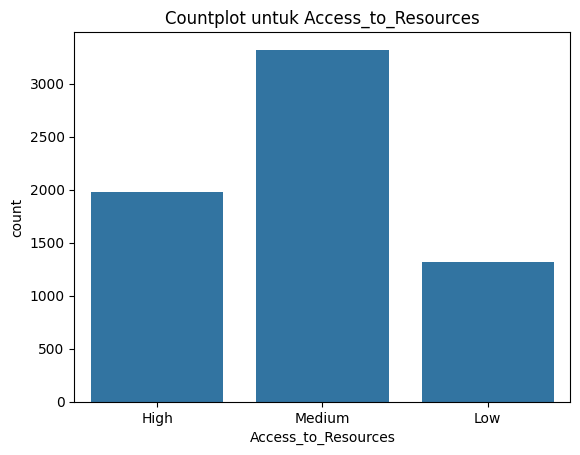

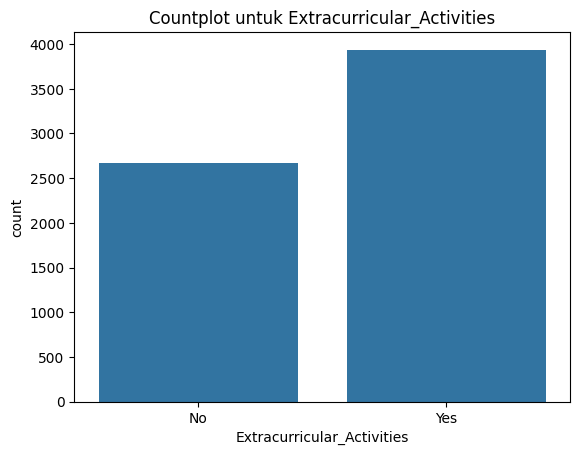

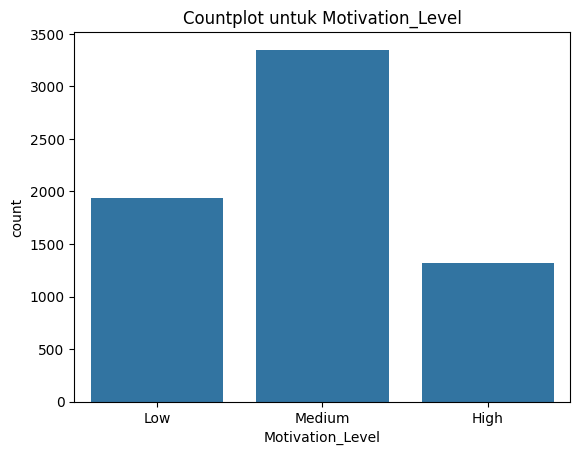

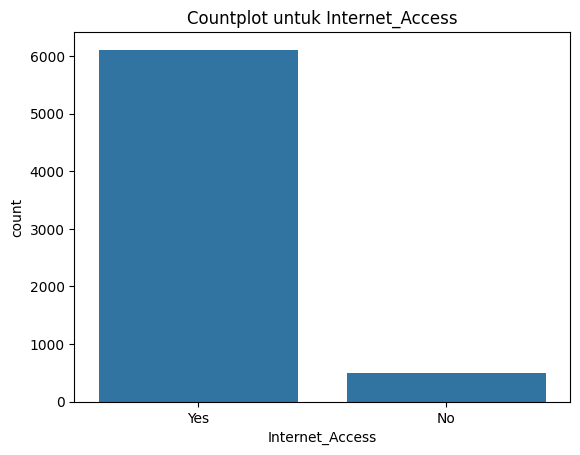

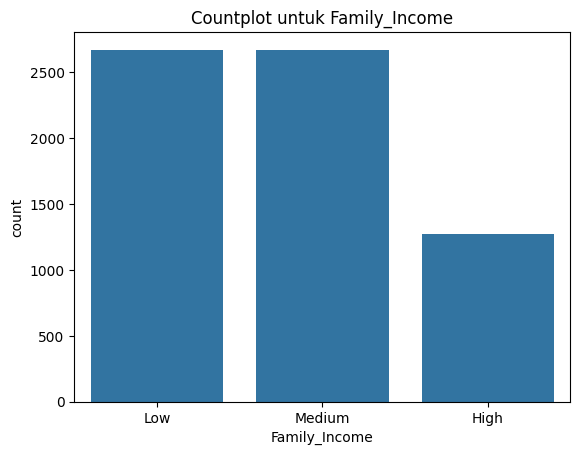

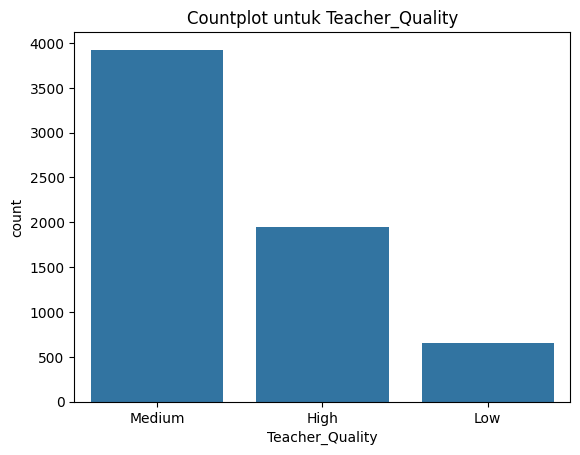

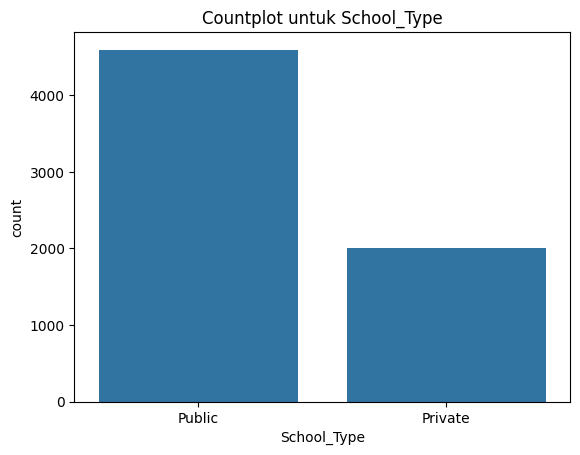

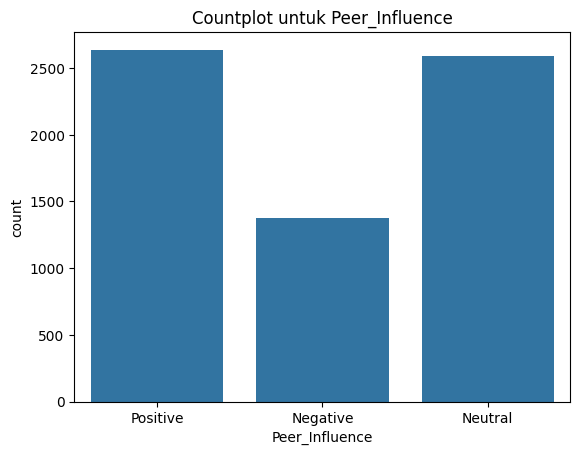

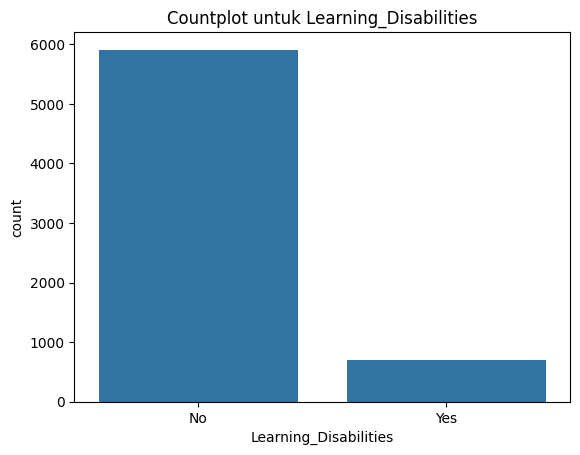

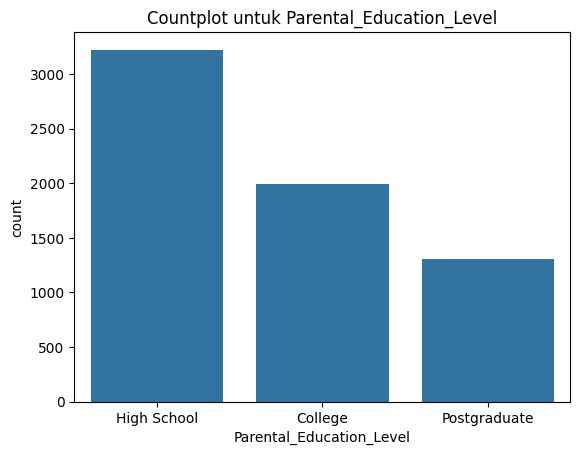

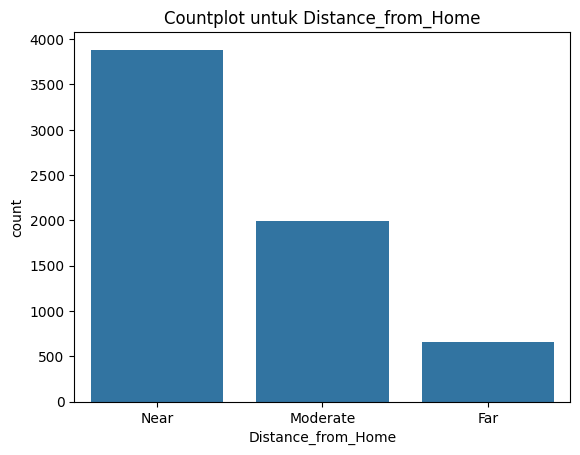

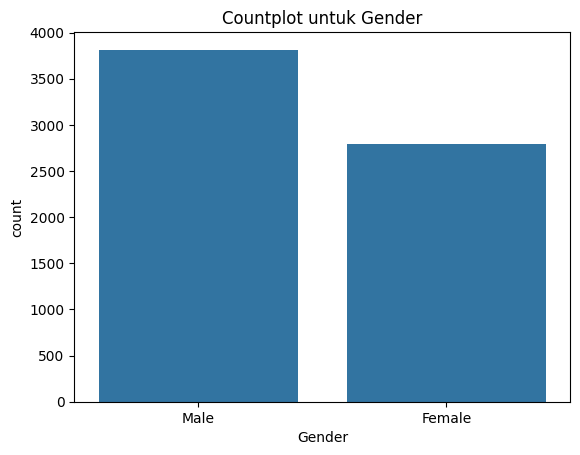

In [19]:
# 1. Visualisasi distribusi variabel numerik
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Variabel Numerik')
plt.show()

# 2. Boxplot untuk mendeteksi outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title('Boxplot untuk Deteksi Outlier')
plt.show()



# 4. Pairplot untuk hubungan antar variabel
sns.pairplot(df)
plt.suptitle('Hubungan Antar Variabel', y=1.02)
plt.show()

# 5. Countplot untuk variabel kategoris (jika ada)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(10, 6))
    for col in categorical_cols:
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot untuk {col}')
        plt.show()


      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     1                    0   
1                19          64                     1                    2   
2                24          98                     2                    2   
3                29          89                     1                    2   
4                19          92                     2                    2   
...             ...         ...                   ...                  ...   
6602             25          69                     0                    2   
6603             23          76                     0                    2   
6604             20          90                     2                    1   
6605             10          86                     0                    0   
6606             15          67                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

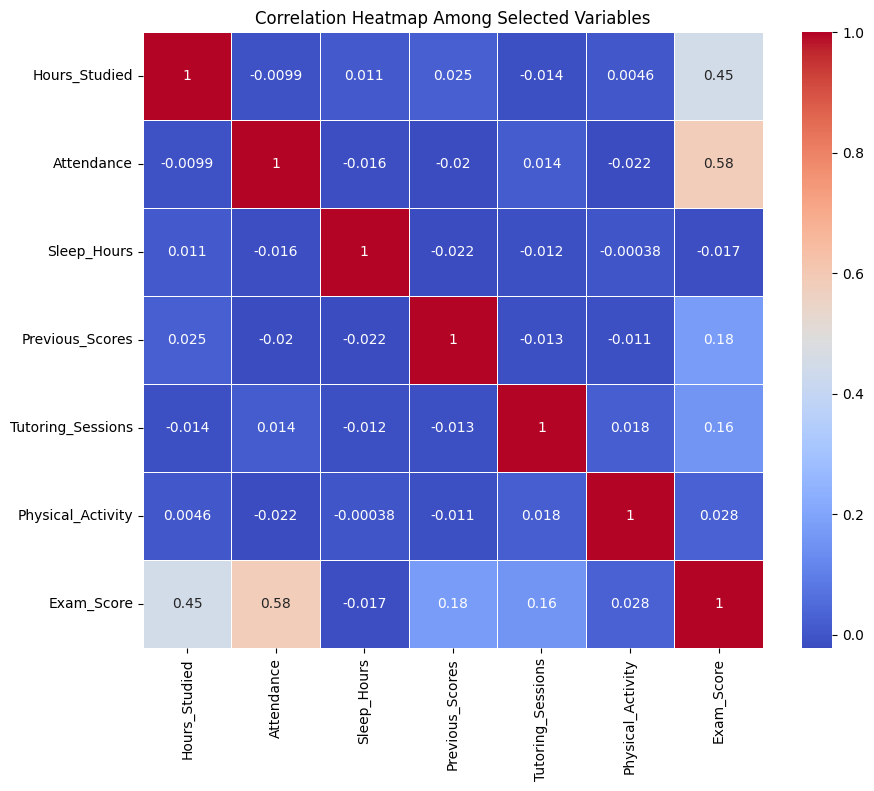

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Function to convert categorical columns into numerical values
def convert_categorical_columns(df):
    # Iterating through all columns in the dataset
    for column in df.columns:
        if df[column].dtype == 'object':  # If the column type is 'object', it's categorical
            # If the column has few categories, we use LabelEncoder
            if df[column].nunique() <= 10:  # Threshold: <=10 categories are considered ordinal
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
            else:
                # If too many categories, use One-Hot Encoding
                df = pd.get_dummies(df, columns=[column], drop_first=True)
    return df

# Convert categorical columns to numeric
df_converted = convert_categorical_columns(df)
print(df_converted)

# Select relevant columns for analysis
selected_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

# Subset the DataFrame with the selected columns
df_selected = df_converted[selected_columns]

# 3. Correlation Heatmap for selected columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Among Selected Variables')
plt.show()


In [21]:
# 1. Mengatasi missing values (misalnya, mengisi dengan median untuk kolom numerik)
df.fillna(df.median(), inplace=True)

# 2. Mendeteksi dan mengatasi outliers (menggunakan Z-score)
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
df_clean = df[(z_scores < 3).all(axis=1)]

# 3. Encoding untuk data kategoris (jika ada)
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 4. Memisahkan fitur dan target
X = df_clean.drop('Exam_Score', axis=1)  # Asumsikan 'Y' adalah target variabel
Y = df_clean['Exam_Score']

# 5. Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Memisahkan data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [23]:
# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [24]:
# Melakukan prediksi menggunakan data testing
Y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 1.2205736952762993
R-Squared: 0.8880081950552421


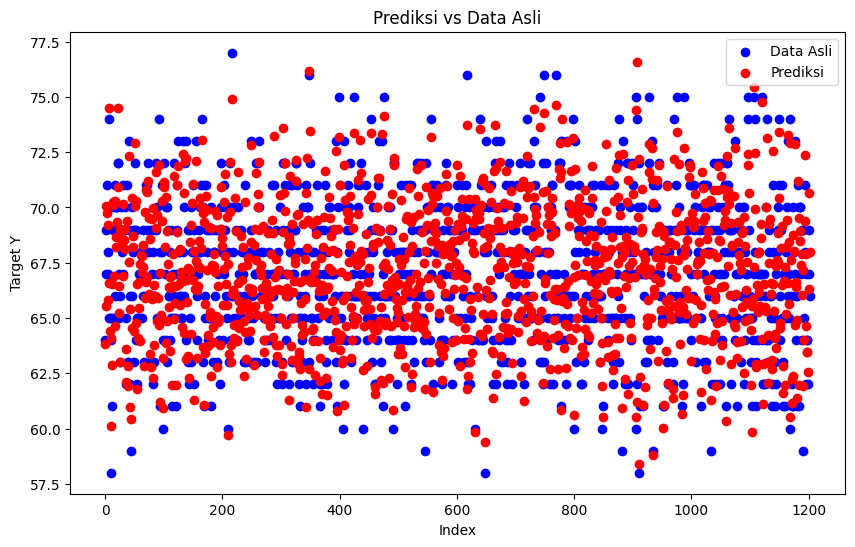

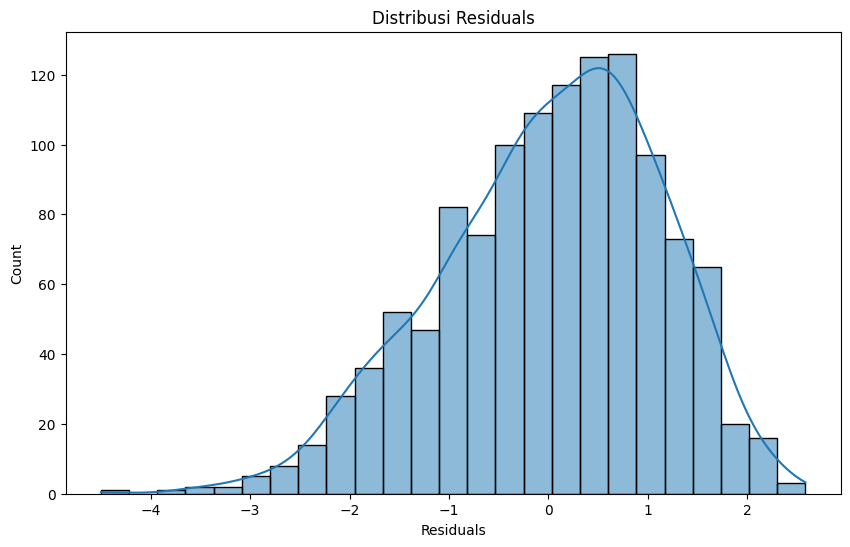

In [25]:
# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Data Asli')
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label='Prediksi')
plt.title('Prediksi vs Data Asli')
plt.xlabel('Index')
plt.ylabel('Target Y')
plt.legend()
plt.show()

# Visualisasi residuals (error)
residuals = Y_test - Y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residuals')
plt.xlabel('Residuals')
plt.show()

In [36]:
# Fungsi untuk melakukan prediksi dengan data baru yang diinput pengguna
def predict_new_data(new_data):
    """
    Fungsi ini menerima input data baru sebagai dictionary, melakukan preprocessing 
    yang sama seperti pada data training, dan mengembalikan hasil prediksi.
    
    Parameters:
    - new_data: Data input baru dalam bentuk dictionary (harus memiliki fitur yang sama dengan data training)
    
    Returns:
    - Prediksi nilai target (Y)
    """
    # Konversi data baru ke DataFrame
    new_df = pd.DataFrame([new_data])
    
    # Fitur kategoris yang perlu di-encode (daftar kategori sesuai dataset training)
    categorical_cols = ['Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 
                        'Internet_Access', 'School_Type', 'Learning_Disabilities', 
                        'Parental_Education_Level', 'Distance_from_Home', 'Gender']
    
    # Lakukan encoding terhadap data kategoris
    new_df_encoded = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)
    
    # Pastikan fitur sesuai dengan data training (menambahkan kolom yang hilang jika perlu)
    missing_cols = set(X.columns) - set(new_df_encoded.columns)
    for col in missing_cols:
        new_df_encoded[col] = 0  # Kolom yang hilang diisi dengan 0
    
    # Mengatur ulang urutan kolom agar sesuai dengan data training
    new_df_encoded = new_df_encoded[X.columns]
    
    # Lakukan scaling fitur numerik
    new_df_scaled = scaler.transform(new_df_encoded)
    
    # Lakukan prediksi menggunakan model yang sudah dilatih
    prediction = model.predict(new_df_scaled)
    
    return prediction[0]

# Contoh penggunaan fungsi predict_new_data()
new_input = {
    'Motivation_Level': 'High', 
    'Internet_Access': 'Yes', 
    'Tutoring_Sessions': 3, 
    'Family_Income': 'Medium', 
    'Teacher_Quality': 'High', 
    'School_Type': 'Public', 
    'Peer_Influence': 'Positive', 
    'Physical_Activity': 7, 
    'Learning_Disabilities': 'Yes', 
    'Parental_Education_Level': 'College', 
    'Distance_from_Home': 'Short', 
    'Gender': 'Female'
}
prediction = predict_new_data(new_input)
print(f'Hasil prediksi untuk input baru: {prediction}')


Hasil prediksi untuk input baru: 43.20324589457916


In [27]:
import joblib

# misalkan model Anda disimpan dalam variabel bernama 'model'
joblib.dump(model, 'model_regression.pkl')


['model_regression.pkl']